# RL Examples for Lecture 8

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
This is a library of useful functions for the control systems in 16.06


## Challenging case to sketch - which do you get? (8-8)
### Helps to know if there are break-in/out points (left one)

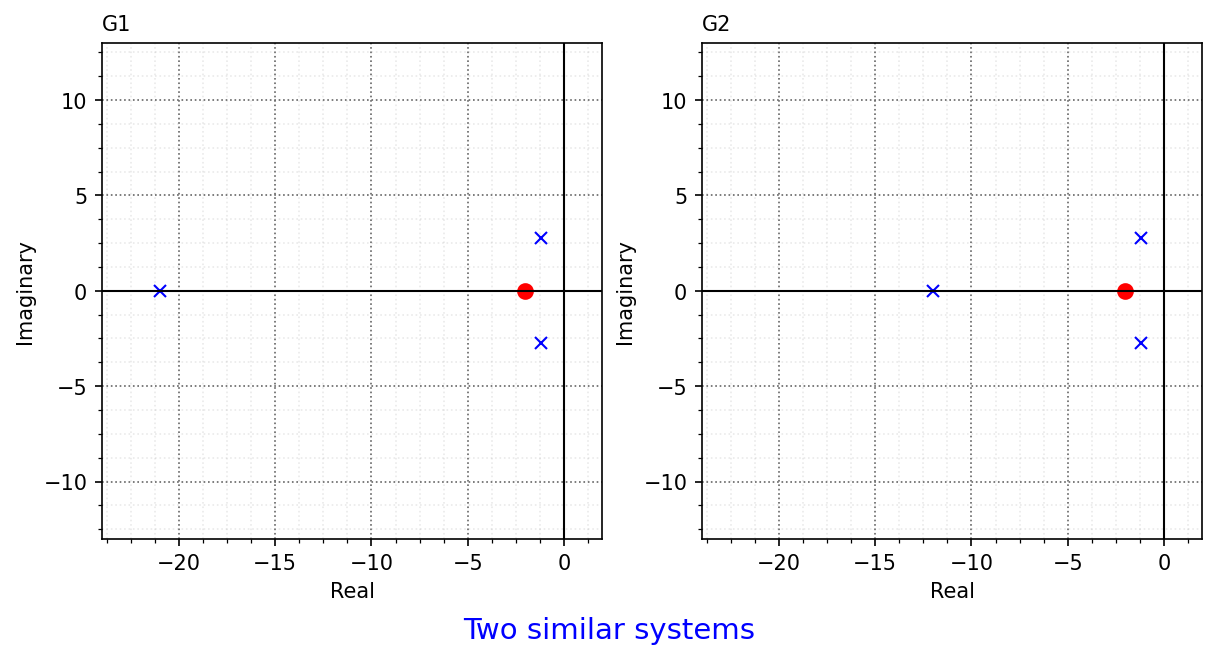

In [2]:
# form two similar systems
z1=2;p1=21
G1 = tf((1,z1), np.convolve((1, 2*3*.4, 9),(1, p1)))
z2=2;p2=12
G2 = tf((1,z2), np.convolve((1, 2*3*.4, 9),(1, p2)))
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
my_pzmap(G1, ax=ax[0])
ax[0].set_title('G1',loc='left')
my_pzmap(G2, ax=ax[1])
ax[1].set_title('G2',loc='left')
caption("Two similar systems",fig)
for kk in range(2):
    ax[kk].set_xlim([-24, 2]);ax[kk].set_ylim([-13,13])
    nicegrid(ax[kk])


Found breakin/out at K = 117.279
At possible locations s = -9.195

Found breakin/out at K = 114.729
At possible locations s = -6.128


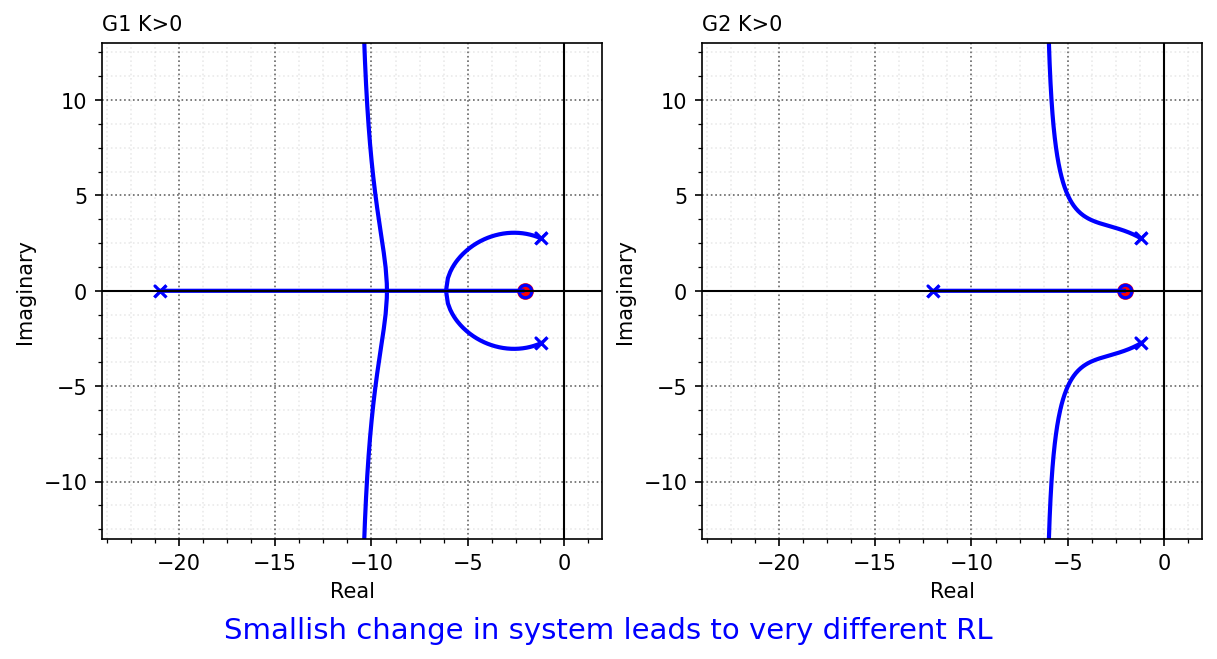


Found breakin/out at K = -89.718
At possible locations s = 0.623

Found breakin/out at K = -52.247
At possible locations s = 0.478


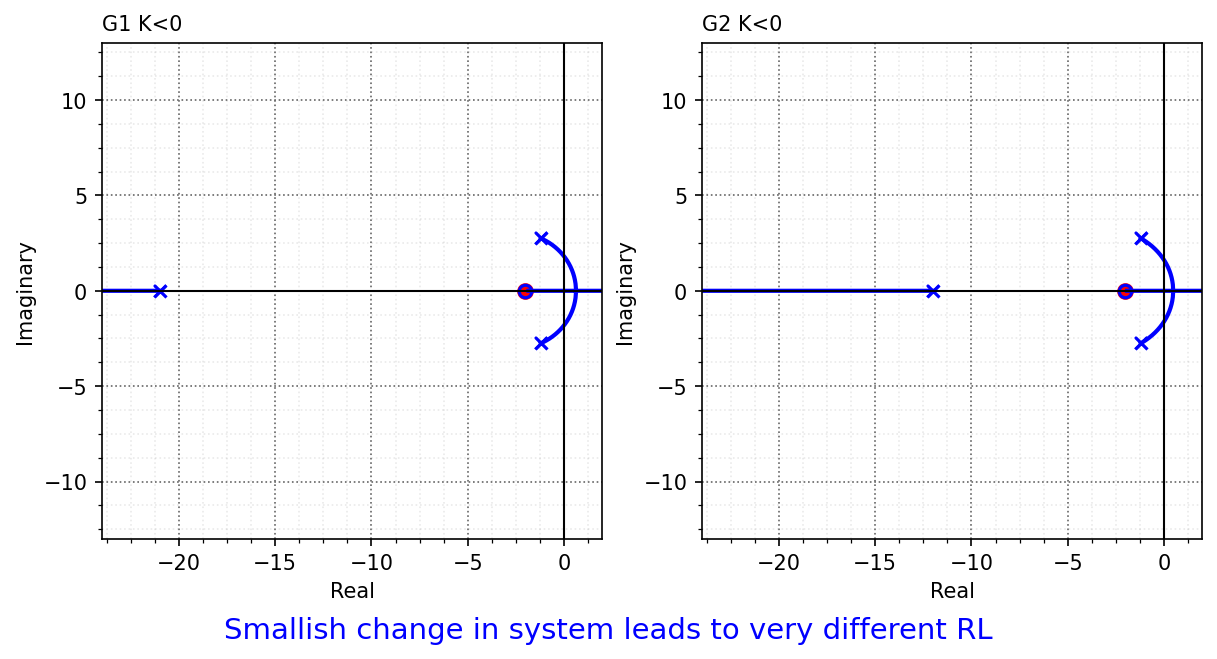

In [7]:
fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
my_pzmap(G1, ax=ax[0])
rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1),  grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-24, 2]);ax[0].set_ylim([-13,13])
nicegrid(ax[0])
ax[0].set_title('G1 K>0',loc='left')

my_pzmap(G2, ax=ax[1])
rlist, klist = rlocus(G2, kvect=Root_Locus_gains(G2),  grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-24, 2]);ax[1].set_ylim([-13,13])
nicegrid(ax[1])
ax[1].set_title('G2 K>0',loc='left')
caption("Smallish change in system leads to very different RL",fig)
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex10_8a.pdf", dpi=600)
plt.show()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
my_pzmap(G1, ax=ax[0])
rlist, klist = rlocus(G1, kvect = Root_Locus_gains(G1,standard_locus=False),  grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-24, 2]);ax[0].set_ylim([-13,13])
nicegrid(ax[0])
ax[0].set_title('G1 K<0',loc='left')

my_pzmap(G2, ax=ax[1])
rlist, klist = rlocus(G2, kvect= Root_Locus_gains(G2,standard_locus=False),  grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-24, 2]);ax[1].set_ylim([-13,13])
nicegrid(ax[1])
ax[1].set_title('G2 K<0',loc='left')
caption("Smallish change in system leads to very different RL",fig)
for kk in range(2):
    #dim = 2.5
    #ax[kk].set_xlim([-dim, dim])
    #ax[kk].set_ylim([-dim, dim])
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex10_8b.pdf", dpi=600)
plt.show()

## Challenging case to sketch - which do you get? (8-10)
### Helps to know if there are break-in/out points (right one)


Found breakin/out at K = -0.000
At possible locations s = 0.000

Found breakin/out at K = 2.726
At possible locations s = -2.266

Found breakin/out at K = 0.000
At possible locations s = 0.000


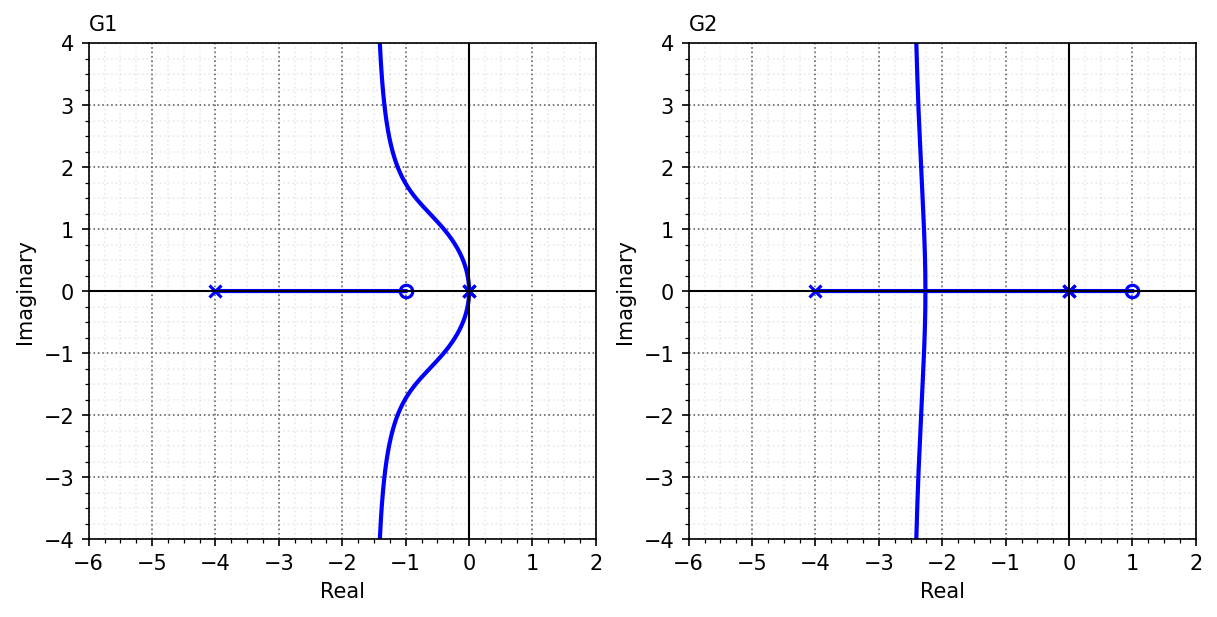

In [ ]:
G1 = tf((1,1), np.convolve((1, 0, 0),(1, 4)))
G2 = tf((1,-1), np.convolve((1, 0, 0),(1, 4)))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1),  grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-6, 2]);ax[0].set_ylim([-4,4])
nicegrid(ax[0])
ax[0].set_title('G1',loc='left')

rlist, klist = rlocus(G2, kvect=Root_Locus_gains(G2),  grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-6, 2]);ax[1].set_ylim([-4,4])
nicegrid(ax[1])
ax[1].set_title('G2',loc='left')
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex10_10.pdf", dpi=600)
plt.show()

# Break-in/Break-out Examples on 8-13


Found breakin/out at K = 33.971
At possible locations s = -1.414

Found breakin/out at K = 0.029
At possible locations s = 1.414


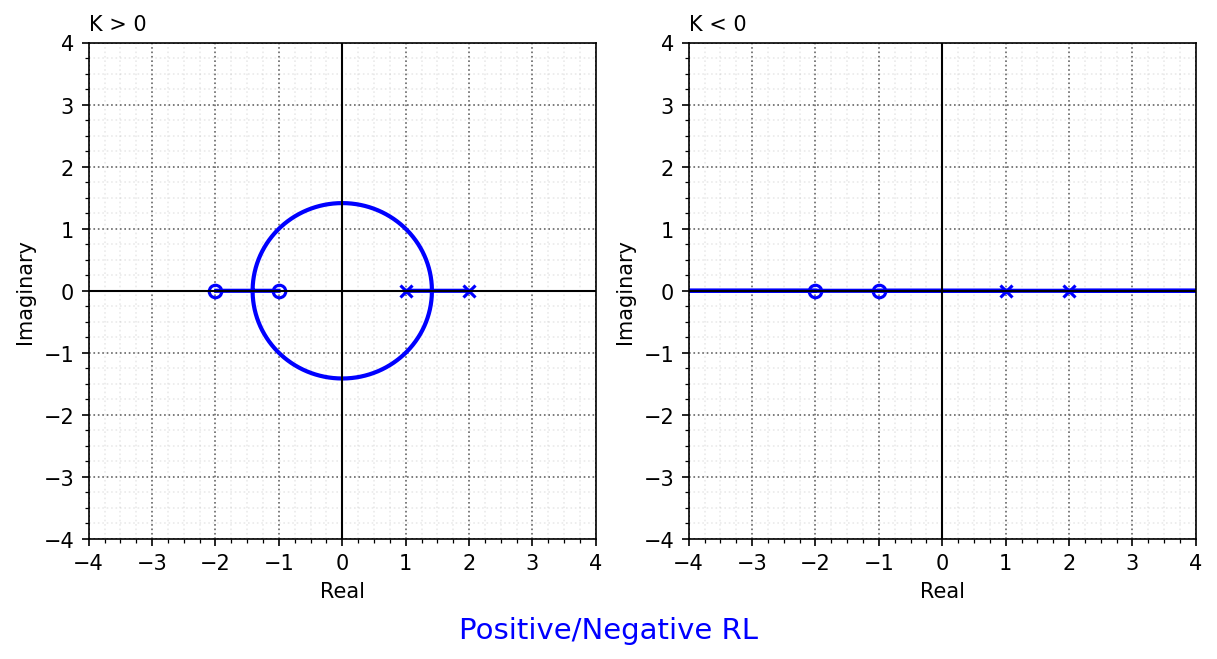

In [ ]:
G = tf(np.convolve((1, 2),(1, 1)), np.convolve((1, -2),(1, -1)))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G),  grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,standard_locus=False),  grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
caption("Positive/Negative RL",fig)
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex10_13a.pdf", dpi=600)
plt.show()



Found breakin/out at K = 0.147
At possible locations s = -0.725


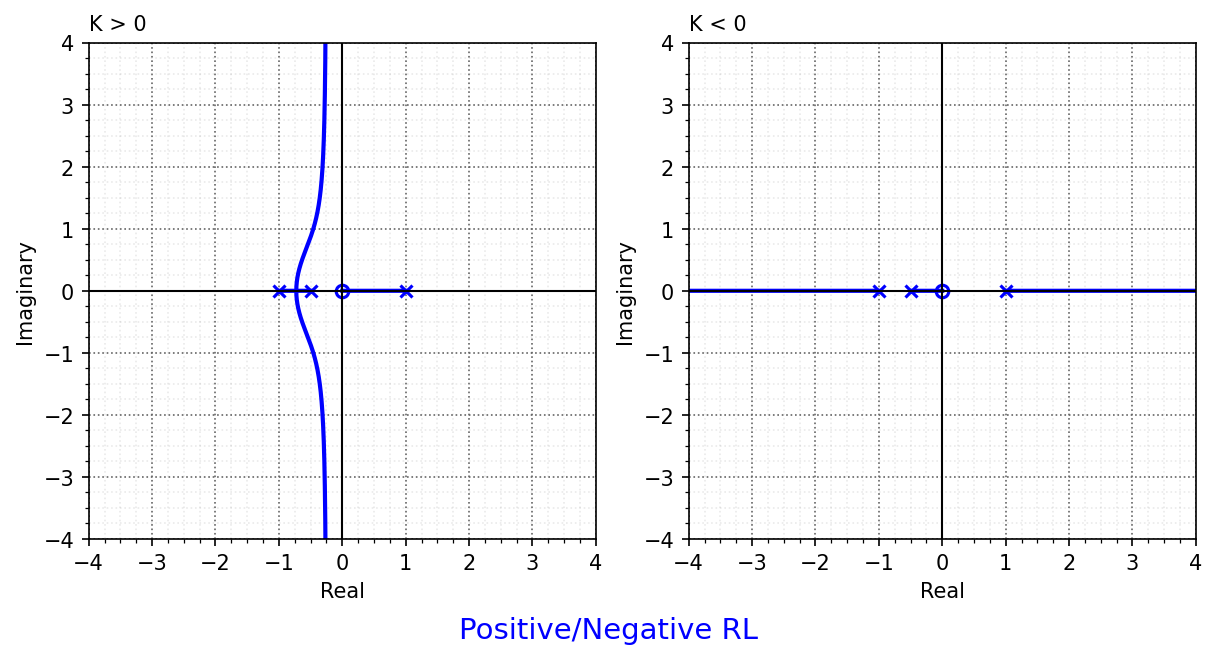

In [ ]:
G = tf(np.convolve((1, 0),(0, 1)), np.convolve((1, 0.5),(1, 0, -1)))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G),  grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')

rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,standard_locus=False),  grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
caption("Positive/Negative RL",fig)
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex10_13b.pdf", dpi=600)
plt.show()


## Simple RL with delay


Found breakin/out at K = 3.034
At possible locations s = -8.983

Found breakin/out at K = 118.966
At possible locations s = 48.983

Found breakin/out at K = 0.351
At possible locations s = -2.325

Found breakin/out at K = 25.649
At possible locations s = 10.325

Found breakin/out at K = 0.072
At possible locations s = -1.464

Found breakin/out at K = 13.928
At possible locations s = 5.464


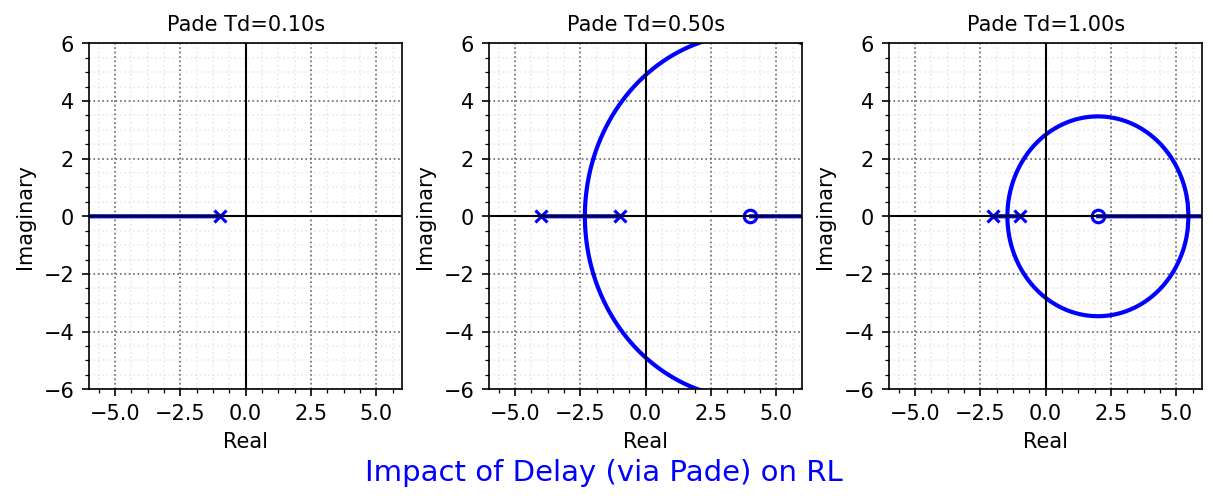

In [ ]:
G = tf((1), (1, 1))

fig, ax = plt.subplots(1,3, figsize=(8, 3),dpi=150,constrained_layout = True)

for kk,Td in enumerate(np.array([0.1,.5,1])):
    num, den = pade(Td, 1)
    Gp = tf(num,den)
    L = G*Gp
    klist = Root_Locus_gains(L)
    rlist, klist = rlocus(G*Gp, kvect=klist,  ax=ax[kk], color='b', grid=False)
    ax[kk].set_xlim([-6, 6]);
    ax[kk].set_ylim([-6, 6])
    nicegrid(ax[kk])
    ax[kk].set_title('Pade Td={0:2.2f}s'.format(Td))
caption("Impact of Delay (via Pade) on RL ",fig)
for kk in range(3):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex10_16.pdf", dpi=600)
plt.show()

## RL Versus Parameter of Interest 

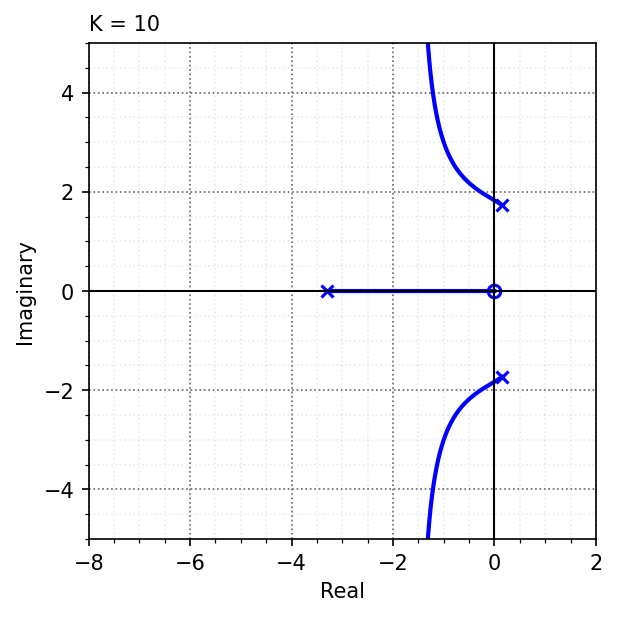

In [ ]:
K = 10
G = tf((K, 0), (1,3,2,K))
klist = Root_Locus_gains(G)
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=klist,  grid=False,color='b',ax=ax)
ax.set_xlim([-8, 2]);ax.set_ylim([-5,5])
nicegrid(ax)
ax.set_title('K = {:1d}'.format(K),loc='left')
for kk in range(2):
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')

savefig("./figs/RL_10_17.pdf", dpi=600)
plt.show()


Found breakin/out at K = -2.488
At possible locations s = 0.911


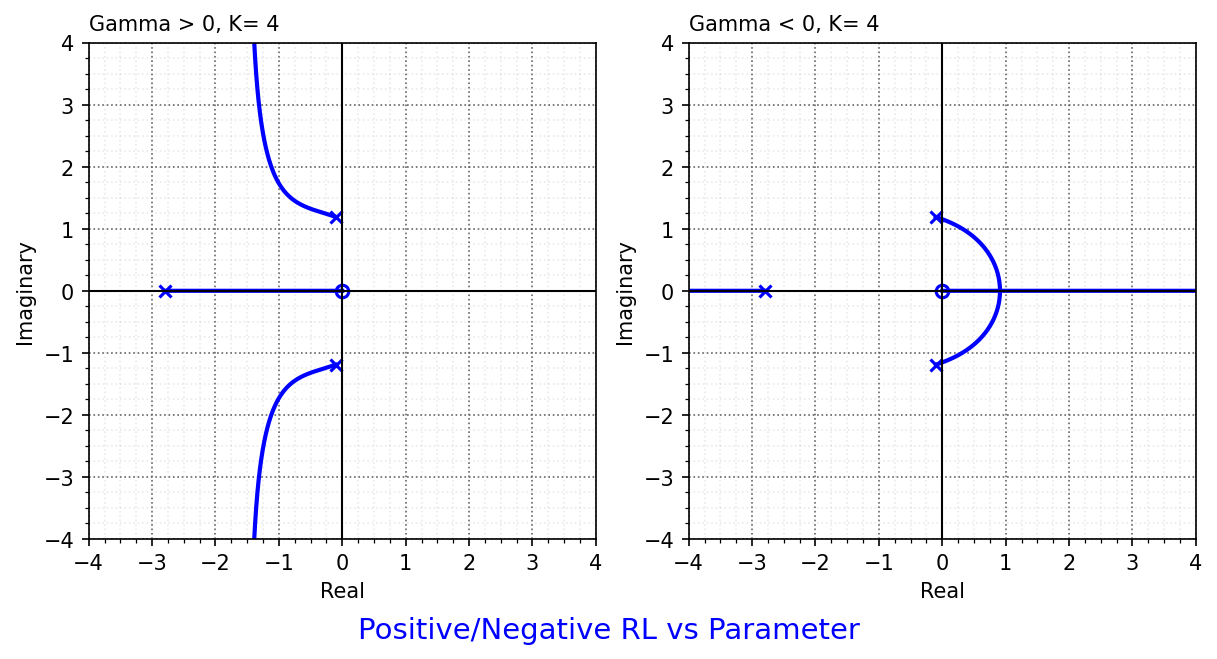

In [ ]:
K = 4
G = tf(np.convolve((K, 0),(0, 1)), np.convolve((1,3,2,K),(0, 1)))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G),  grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])
ax[0].set_title('Gamma > 0, K={:2d}'.format(K),loc='left')

rlist, klist = rlocus(G, kvect=Root_Locus_gains(G, standard_locus=False),  grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
ax[1].set_title('Gamma < 0, K={:2d}'.format(K),loc='left')
caption("Positive/Negative RL vs Parameter",fig)
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/RL_10_17a.pdf", dpi=600)
plt.show()

## Example 10-18


Found breakin/out at K = -415.863
At possible locations s = -8.374


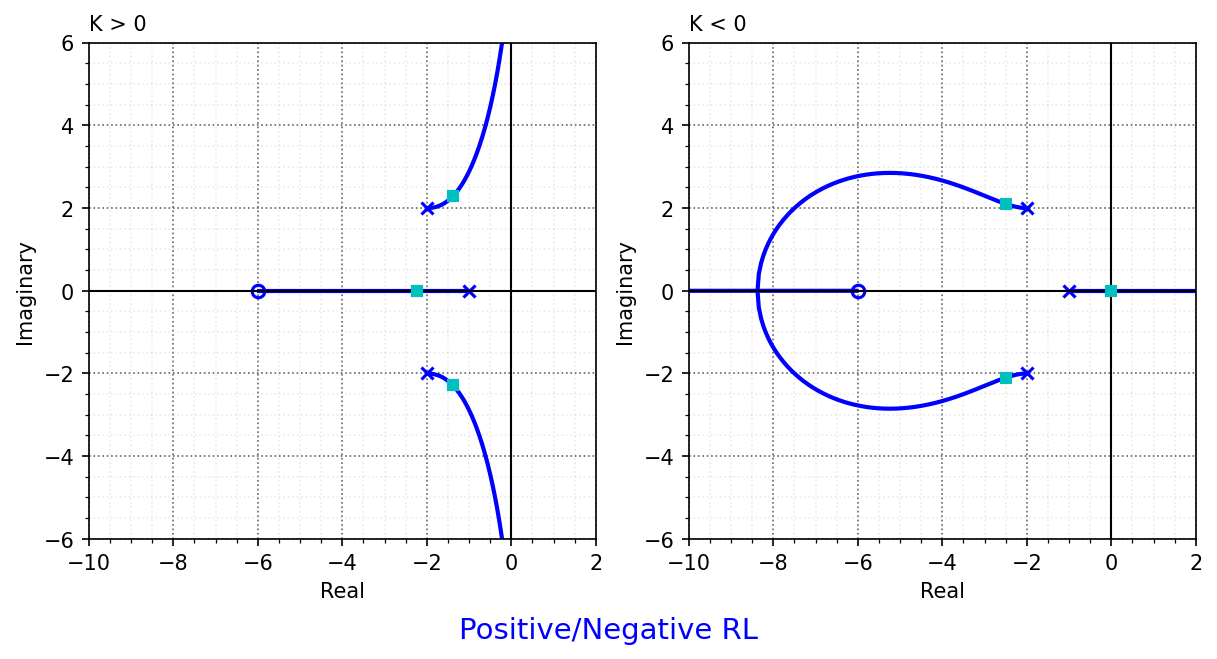

In [12]:
G = tf((1, 6), np.convolve((1,4,8),(1, 1)))/3

K = tf((4),(0, 1))
Gcl = feedback(K,G)
scl = np.roots(Gcl.den[0][0])

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G,Krange=np.logspace(-4,4,1000)),  grid=False,color='b',ax=ax[0])
ax[0].set_xlim([-10, 2]);ax[0].set_ylim([-6, 6])
nicegrid(ax[0])
ax[0].set_title('K > 0',loc='left')
ax[0].plot(scl.real,scl.imag,'cs',ms=5)
ax[0].plot(scl.real,-scl.imag,'cs',ms=5)

K = tf((-4),(0, 1))
Gcl = feedback(K,G)
scl = np.roots(Gcl.den[0][0])

rlist, klist = rlocus(G, kvect=Root_Locus_gains(G, Krange = -np.logspace(-4,4,1000),standard_locus=False),  grid=False,color='b',ax=ax[1])
ax[1].set_xlim([-10, 2]);ax[1].set_ylim([-6, 6])
nicegrid(ax[1])
ax[1].set_title('K < 0',loc='left')
ax[1].plot(scl.real,scl.imag,'cs',ms=5)
caption("Positive/Negative RL",fig)
for kk in range(2):
    ax[kk].set_xlabel('Real')
    ax[kk].set_ylabel('Imaginary')
savefig("./figs/Ex10_18.pdf", dpi=600)
plt.show()